In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from scipy.stats import chisquare
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier
import random
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
#read csv
BF=pd.read_csv("Battlefieldreviews.csv")

In [3]:
#look at data
BF.head(5)

,Unnamed: 0,helpful,recommendations,hours,review,date
0,0,No one has rated this review as helpful yet0,Recommended,95.9 hrs on record,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tPretty good no...,Posted: 27 January
1,1,No one has rated this review as helpful yet0,Recommended,1.0 hrs on record,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tsurprisingly g...,Posted: 27 January
2,2,No one has rated this review as helpful yet0,Recommended,5.5 hrs on record,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\ti got this gam...,Posted: 27 January
3,3,1 person found this review helpful0,Recommended,54.8 hrs on record,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tstarted out ro...,Posted: 27 January
4,4,1 person found this review helpful0,Recommended,35.6 hrs on record,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFun game\t\t\t,Posted: 27 January


In [4]:
BF=BF.drop(["Unnamed: 0"],axis=1)

In [5]:
#remove \t from review column
BF['review']=BF.apply(lambda row: re.sub("\t","",str(row['review'])),axis =1)

In [6]:
#split X amount of people found this helpful and Y amount of people found this funny 
BF[["Help","funny"]]=BF["helpful"].str.split(n=1,expand= True)

In [7]:
#Remove all letters from Help
BF['Help']=BF.apply(lambda row: re.sub("[A-z]","",str(row['Help'])),axis =1)

In [8]:
#remove all letters from funny
BF['funny']=BF.apply(lambda row: re.sub("[A-z]","",str(row['funny'])),axis =1)

In [9]:
#remove all letters froms hours
BF['hours']=BF.apply(lambda row: re.sub("[A-z]","",str(row['hours'])),axis =1)

In [10]:
# remove spaces in hours
BF['hours']=BF.apply(lambda row: re.sub(" ","",str(row['hours'])),axis =1)

In [11]:
#remove ',' from hours
BF['hours']=BF.apply(lambda row: re.sub(",","",str(row['hours'])),axis =1)

In [12]:
#covert string to float
BF["hours"]=BF["hours"].astype("float")

In [13]:
#remove posted from date
BF["date"] = BF.apply(lambda row: re.sub("Posted: ","",str(row["date"])),axis =1)

In [14]:
#extract month from date and put it in its column
BF["Month"]=BF.apply(lambda row : re.search("[A-z]+", str(row["date"])).group(),axis =1)
BF["Month"].unique()

array(['January', 'December', 'November', 'October', 'September',
       'August', 'July', 'June', 'May', 'April', 'March', 'February'],
      dtype=object)

In [15]:
#extract day from date
BF["Day"]=BF.apply(lambda row : re.search("[0-9]+", str(row["date"])).group(),axis =1)
BF["Day"].unique()

array(['27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17',
       '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5',
       '4', '3', '2', '1', '31', '30', '29', '28'], dtype=object)

In [16]:
#extract year from date
BF["Year"]=BF.apply(lambda row : re.search("[0-9]*$", str(row["date"])).group(),axis =1)

In [17]:
#remove days from the years column
BF["Year"]=BF["Year"].str.replace("^..$|^.$","")

C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\552455930.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["Year"]=BF["Year"].str.replace("^..$|^.$","")


In [18]:
#convert year to numeric and fill the nas with 2023 year
BF["Year"]=pd.to_numeric(BF["Year"]).fillna(2023)

In [19]:
BF["Year"]=BF["Year"].astype("string")
BF["Year"]=BF["Year"].str.replace(".0$","")
BF["Year"] = BF["Year"].astype("string")
BF["date"]=BF["Month"] +"-"+ BF["Day"] +"-"+ BF["Year"]

C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\1344057348.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["Year"]=BF["Year"].str.replace(".0$","")


In [20]:
#change help from string to float
BF["Help"]=pd.to_numeric(BF["Help"].str.replace(",","")).fillna(0)

In [21]:
# remove all letters and special charactors and convert string into numeric
BF["funny"]=BF["funny"].str.replace("<.*","")
BF["funny"]=BF["funny"].str.strip()
BF["funny"]=BF["funny"].str.replace("[A-z][0-9]","")
BF["funny"]=BF["funny"].str.replace(" [0-9]$","")
BF["funny"]=BF["funny"].str.replace(",","")
BF["funny"]=pd.to_numeric(BF["funny"])
BF["funny"]=BF.funny.fillna(0)

C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\421992709.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["funny"]=BF["funny"].str.replace("<.*","")
C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\421992709.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["funny"]=BF["funny"].str.replace("[A-z][0-9]","")
C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\421992709.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["funny"]=BF["funny"].str.replace(" [0-9]$","")


In [22]:
#looking at data
BF.describe()

,hours,Help,funny
count,53547.000000,53547.000000,53547.000000
mean,79.308611,5.103180,1.985751
std,136.645217,104.535163,65.154383
min,0.100000,0.000000,0.000000
25%,12.400000,0.000000,0.000000
50%,40.200000,1.000000,0.000000
75%,93.950000,2.000000,0.000000
max,7570.100000,12385.000000,8990.000000


array([[<AxesSubplot:title={'center':'hours'}>,
        <AxesSubplot:title={'center':'Help'}>],
       [<AxesSubplot:title={'center':'funny'}>, <AxesSubplot:>]],
      dtype=object)

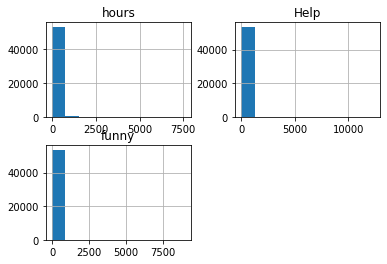

In [23]:
BF[["hours","Help","funny"]].hist()

<AxesSubplot:>

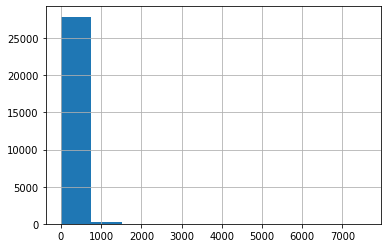

In [24]:
#Majority of players that recommended the game are between 0 to 600 hours played
BF.loc[BF["recommendations"]== 'Recommended']["hours"].hist()

<AxesSubplot:>

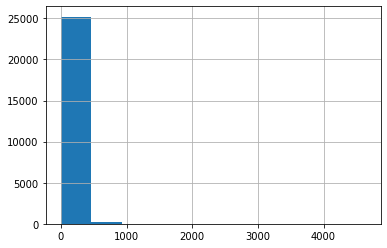

In [25]:
#Majority of players that do not recommended the game are between 0 to 600 hours played
BF.loc[BF["recommendations"]== 'Not Recommended']["hours"].hist()

In [26]:
#HoursBinned
BF["HoursBinned"]=pd.qcut(BF["hours"],q=4)
BF["HoursBinned"]

0        (93.95, 7570.1]
1          (0.099, 12.4]
2          (0.099, 12.4]
3          (40.2, 93.95]
4           (12.4, 40.2]
              ...       
53542      (0.099, 12.4]
53543      (0.099, 12.4]
53544      (0.099, 12.4]
53545      (0.099, 12.4]
53546       (12.4, 40.2]
Name: HoursBinned, Length: 53547, dtype: category
Categories (4, interval[float64, right]): [(0.099, 12.4] < (12.4, 40.2] < (40.2, 93.95] < (93.95, 7570.1]]

In [27]:
#Hoursbinned and recommendations 
c=BF.groupby(["HoursBinned","recommendations"]).count().reset_index()
c

,HoursBinned,recommendations,helpful,hours,review,date,Help,funny,Month,Day,Year
0,"(0.099, 12.4]",Not Recommended,10137,10137,10137,10137,10137,10137,10137,10137,10137
1,"(0.099, 12.4]",Recommended,3257,3257,3257,3257,3257,3257,3257,3257,3257
2,"(12.4, 40.2]",Not Recommended,6285,6285,6285,6285,6285,6285,6285,6285,6285
3,"(12.4, 40.2]",Recommended,7111,7111,7111,7111,7111,7111,7111,7111,7111
4,"(40.2, 93.95]",Not Recommended,4998,4998,4998,4998,4998,4998,4998,4998,4998
5,"(40.2, 93.95]",Recommended,8372,8372,8372,8372,8372,8372,8372,8372,8372
6,"(93.95, 7570.1]",Not Recommended,4030,4030,4030,4030,4030,4030,4030,4030,4030
7,"(93.95, 7570.1]",Recommended,9357,9357,9357,9357,9357,9357,9357,9357,9357


In [28]:
#calculate chisquare test for hours played and recommendate, the more hours somone has 
#the more likely they would recommend this game
NumberofNonRecommended=c[c["recommendations"]== "Not Recommended"]["helpful"].to_numpy()
NumberofRecommended=c[c["recommendations"]== "Recommended"]["helpful"].to_numpy()

d=np.array([NumberofNonRecommended,NumberofRecommended]).T
chisquare(d)

Power_divergenceResult(statistic=array([3387.8621611 , 3054.82446525]), pvalue=array([0., 0.]))

<AxesSubplot:xlabel='hours', ylabel='Help'>

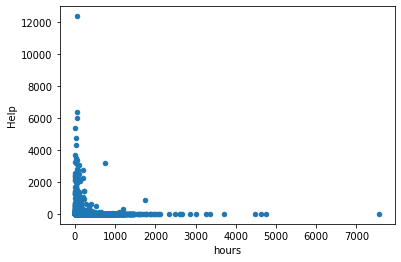

In [29]:
#there is no correlation between hours played and if the review was helpful for some people
BF.plot.scatter(x = "hours",
               y="Help")

<AxesSubplot:xlabel='hours', ylabel='funny'>

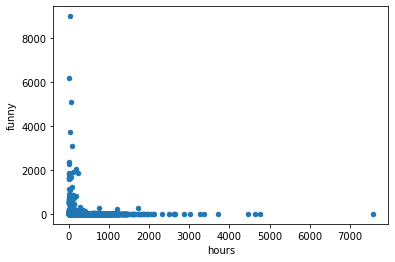

In [30]:
#there is no correlation between hours played and if the review was funny for some people
BF.plot.scatter(x = "hours",
               y="funny")

<AxesSubplot:xlabel='funny', ylabel='Help'>

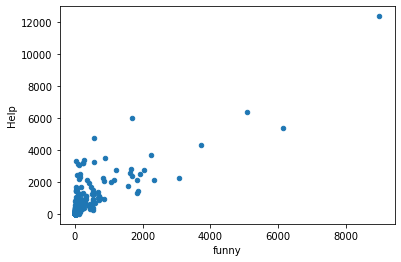

In [31]:
#seems to be correlation between Helpful and funny
BF.plot.scatter(x = "funny",
               y="Help")

In [32]:
BF.recommendations.value_counts()

Recommended        28097
Not Recommended    25450
Name: recommendations, dtype: int64

In [33]:
c=BF.groupby(["Year","Month","recommendations"]).count().reset_index()
k=c[c["Year"]=="2022"]

C:\Users\bobby\AppData\Local\Temp\ipykernel_9916\2256224655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['Month'] = pd.Categorical(k['Month'], categories=months, ordered=True)


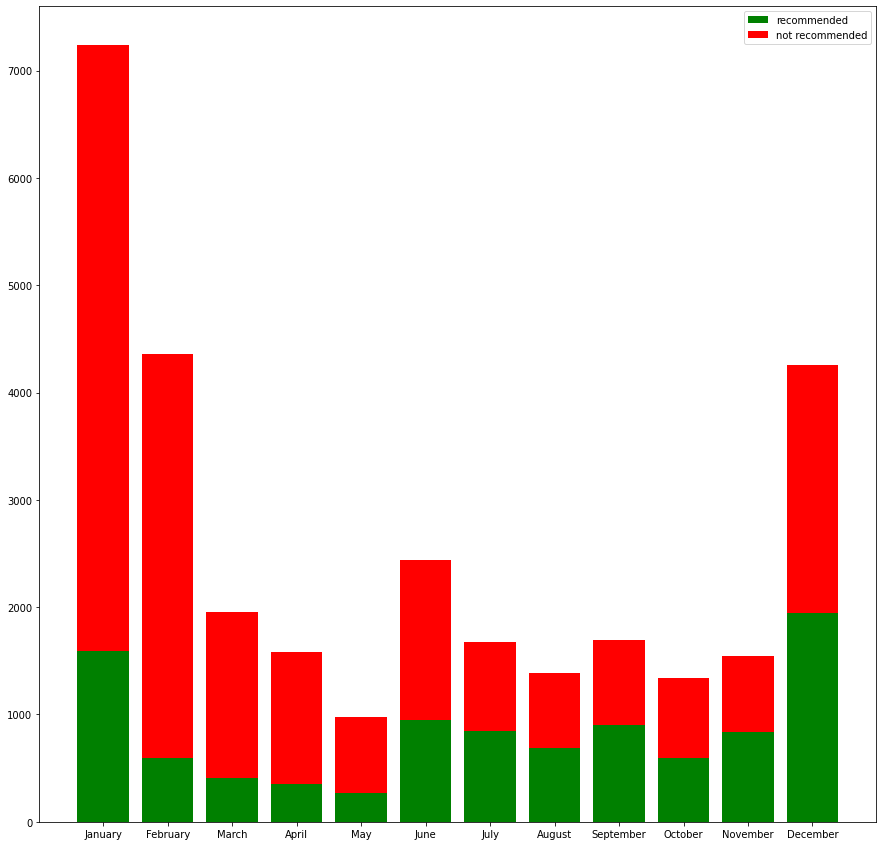

In [34]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
k['Month'] = pd.Categorical(k['Month'], categories=months, ordered=True)
k=k.sort_values(by="Month")
plt.figure(figsize=(15,15))
plt.bar(k[k["recommendations"]=="Recommended"].Month,
         k[k["recommendations"]=="Recommended"].helpful,
        label="recommended",
       color='green')


plt.bar(k[k["recommendations"]=="Not Recommended"].Month,
         k[k["recommendations"]=="Not Recommended"].helpful,
        label="not recommended",
       color='red',
       bottom=k[k["recommendations"]=="Recommended"].helpful)


plt.legend()
plt.show()


<AxesSubplot:>

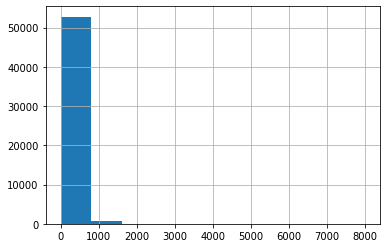

In [35]:
BF["length_of_review"]=BF.review.apply(len)
BF.length_of_review.hist()

In [36]:
#Put positive reviews in one variable
postive = BF[BF["recommendations"] == "Recommended"]
pos_list = postive["review"].tolist()

#Put negative reviews in another variable
neg = BF[BF["recommendations"] == "Not Recommended"]
neg_list = neg["review"].tolist()

In [37]:
#lower the words in both variables
pos_list_lowered = [word.lower() for word in pos_list] 
neg_list_lowered = [word.lower() for word in neg_list]

In [38]:
# add all the tuples together with a space inbetween
pos_list_to_string = ' '.join([str(elem) for elem in pos_list_lowered])  
neg_list_to_string = ' '.join([str(elem) for elem in neg_list_lowered])

In [39]:
stop=stopwords.words('english')
stop.extend(["get","play","still","♥♥♥♥","game","ºل͟º","༽༼"])

In [40]:
#create stop words
stop = set(stop + list(string.punctuation))

In [41]:
# words will be separated based on whitespace
tokenizer = WhitespaceTokenizer()

In [42]:
#remove stops words from list
filtered_pos_list = [w for w in tokenizer.tokenize(pos_list_to_string) if w not in stop]

filtered_neg_list = [w for w in tokenizer.tokenize(neg_list_to_string) if w not in stop]

In [43]:
#remove punctuation
filtered_pos_list2 = [w.strip(string.punctuation) for w in filtered_pos_list]
filtered_neg_list2 = [w.strip(string.punctuation) for w in filtered_neg_list]

In [44]:
#check the frequency of words
fd_pos = nltk.FreqDist(filtered_pos_list2)
fd_neg = nltk.FreqDist(filtered_neg_list2)

In [45]:
fd_pos.most_common(10)

[('fun', 7807),
 ('good', 5278),
 ('battlefield', 5044),
 ('like', 4305),
 ('game', 4227),
 ('bugs', 3109),
 ('better', 2923),
 ('great', 2292),
 ('really', 2210),
 ('bad', 2206)]

In [46]:
fd_neg.most_common(20)

[('battlefield', 5492),
 ('game', 4447),
 ('like', 3755),
 ('even', 3237),
 ('refund', 2786),
 ('bad', 2568),
 ('money', 2427),
 ('time', 2163),
 ('buy', 2060),
 ('ea', 1944),
 ('games', 1858),
 ('one', 1735),
 ('played', 1715),
 ('it', 1662),
 ('would', 1653),
 ('ever', 1561),
 ('good', 1508),
 ('worst', 1493),
 ('fun', 1484),
 ('back', 1432)]

In [47]:
words = ["game","launch","shield","fun","issue","ea","time","gameplay"]
num_in_good = []
for x in words:
    num_in_good.append(fd_pos[x])
num_in_bad = []
for x in words:
    num_in_bad.append(fd_neg[x])
    

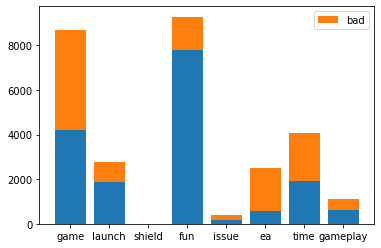

In [48]:
plt.bar(words,num_in_good)
plt.bar(words, num_in_bad,bottom = num_in_good, label = "bad")
plt.legend()
plt.show()

In [49]:
k=fd_neg+ fd_pos

In [50]:
k.most_common(20)

[('battlefield', 10536),
 ('fun', 9291),
 ('game', 8674),
 ('like', 8060),
 ('good', 6786),
 ('bad', 4774),
 ('bugs', 4374),
 ('better', 4339),
 ('even', 4230),
 ('time', 4088),
 ('it', 3724),
 ('games', 3610),
 ('really', 3517),
 ('playing', 3061),
 ('would', 3038),
 ('one', 3003),
 ('refund', 2899),
 ('people', 2898),
 ('played', 2867),
 ('great', 2770)]

In [51]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(filtered_pos_list2)
finder.ngram_fd

FreqDist({('yes', 'yes', 'yes'): 439, ('feels', 'like', 'battlefield'): 111, ('bad', 'company', '2'): 95, ('come', 'long', 'way'): 68, ('bad', 'people', 'say'): 66, ('needs', 'lot', 'work'): 53, ('feel', 'like', 'battlefield'): 50, ('lot', 'fun', 'playing'): 47, ('noice', 'noice', 'noice'): 46, ('best', 'battlefield', 'ever'): 40, ...})

In [52]:
finder = nltk.collocations.BigramCollocationFinder.from_words(filtered_pos_list2)
finder.ngram_fd

FreqDist({('yes', 'yes'): 451, ('like', 'battlefield'): 404, ('good', 'game'): 404, ('feels', 'like'): 366, ('lot', 'fun'): 365, ('really', 'fun'): 364, ('negative', 'reviews'): 359, ('much', 'better'): 356, ('fun', 'game'): 354, ('pretty', 'good'): 336, ...})

In [53]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(filtered_neg_list2)
finder.ngram_fd

FreqDist({('refund', 'refund', 'refund'): 1144, ('server', 'crash', 'server'): 182, ('crash', 'server', 'crash'): 182, ('hell', 'hell', 'hell'): 176, ('worst', 'battlefield', 'ever'): 167, ('poop', 'poop', 'poop'): 139, ('want', 'money', 'back'): 135, ('played', 'free', 'weekend'): 133, ('feel', 'like', 'battlefield'): 120, ('give', 'money', 'back'): 114, ...})

In [54]:
finder = nltk.collocations.BigramCollocationFinder.from_words(filtered_neg_list2)
finder.ngram_fd

FreqDist({('refund', 'refund'): 1149, ('waste', 'money'): 539, ('free', 'weekend'): 508, ('money', 'back'): 447, ('feels', 'like'): 437, ('feel', 'like'): 408, ('worst', 'battlefield'): 398, ('battlefield', 'game'): 354, ('ever', 'played'): 318, ('battlefield', '4'): 299, ...})

In [55]:
pos = BF[(BF["recommendations"]=="Recommended") &  (BF["Year"]=="2023") & (BF["Month"]=="January")]  
pos_list = pos["review"].tolist()
pos_list_lowered = [word.lower() for word in pos_list] 
pos_list_to_string = ' '.join([str(elem) for elem in pos_list_lowered]) 

In [56]:
k= SentimentIntensityAnalyzer()

In [57]:
#get rid of reviews containing less than two words unless the review contains key words (shields,tank, shield, etc.)
keywords =["shield","shields","tank","tanks","op"]
rangeof = range(1,len(pos_list_lowered))


for i in rangeof:
    try:
        cur=pos_list_lowered[i]
    except:
        break
    if (len(cur.split()) <=2) and (cur.split() not in keywords):
        del pos_list_lowered[i]


In [58]:
rangeofposreviews = range(1,len(pos_list_lowered))
for i in rangeofposreviews:
    if k.polarity_scores(pos_list_lowered[i])["neg"] > k.polarity_scores(pos_list_lowered[i])["pos"]:
        print(k.polarity_scores(pos_list_lowered[i]))
        print("\n "+ str(i))
        print("\n")
        print(pos_list_lowered[i] + "\n")

{'neg': 0.142, 'neu': 0.737, 'pos': 0.121, 'compound': -0.1027}

 10


dice, please let me buy the skybreaker skin for lis, you literally stand to lose nothing.

{'neg': 0.19, 'neu': 0.674, 'pos': 0.136, 'compound': -0.3299}

 11


really fun game and all the problems that has been plaguing the game has been fixed. only issue i see now is some rare but sporadic texture problems, but they are definitely no game breaker/changer.

{'neg': 0.381, 'neu': 0.464, 'pos': 0.155, 'compound': -0.7061}

 17


not as good as bf4, but good enough to satisfy your need for pure bf chaos

{'neg': 0.327, 'neu': 0.476, 'pos': 0.197, 'compound': -0.2263}

 22


is it as good as the other battlefield games? no. 

{'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.3818}

 27


battlefield 1 is still undefeated.

{'neg': 0.239, 'neu': 0.554, 'pos': 0.207, 'compound': -0.5332}

 33


this is honestly really good now, i played the beta and hated it. it just didn't feel like battlefield. i finally gave the

{'neg': 0.656, 'neu': 0.0, 'pos': 0.344, 'compound': -0.4588}

 504


fun battlefield chaos

{'neg': 0.197, 'neu': 0.618, 'pos': 0.185, 'compound': -0.0516}

 507


lot of fun and have seen only one guaranteed cheater in 26 hours.

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859}

 520


shoot shoot

{'neg': 0.469, 'neu': 0.306, 'pos': 0.224, 'compound': -0.5267}

 522


hell yeah try it now

{'neg': 0.029, 'neu': 0.956, 'pos': 0.015, 'compound': -0.296}

 524


como alguém que faz tempo que não joga bf, estou me divertindo. o jogo é meio caótico no modo 128 players, o design de mapa é de longe o pior da franquia, pra o jogo que introduziu o modo com 128 players os mapas são vazios e não tem cover pra suportar essa quantidade de players. o design das armas está daora, eu não sou fã de jogos futuristas mas o bf2042 me surpreendeu com ideias simples, não é aquele futuro com naves espaciais e armas de laser, é um futuro pensado nas tecnologias militares que estão em desenvolvimen

(-0.5, 799.5, 399.5, -0.5)

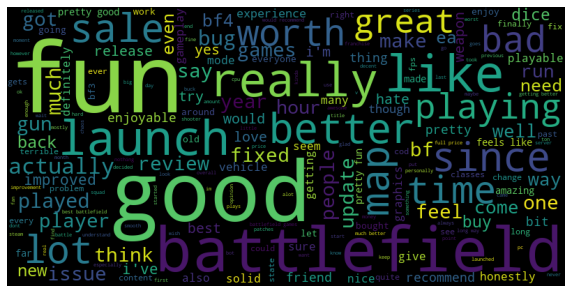

In [59]:
wordcloud = WordCloud(width=800, height=400, stopwords= stop).generate(pos_list_to_string)
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

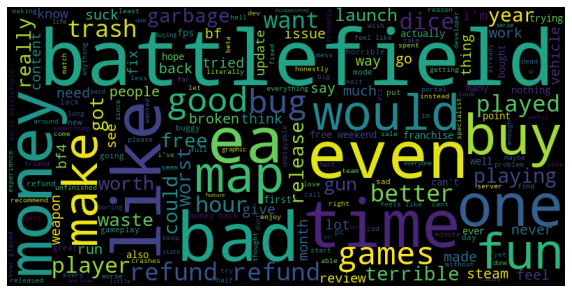

In [60]:
wordcloud = WordCloud(width=800, height=400,stopwords= stop).generate(neg_list_to_string)
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud)
plt.axis("off")

In [61]:
from nrclex import NRCLex

In [62]:
def emotion(x):
    '''
    input: a string
    output: a dictionary that shows the emotions of that string
    usage: function of a column'''
    x = NRCLex(x)
    return x.affect_frequencies


In [63]:
BF.review.apply(emotion)

0        {'fear': 0.1, 'anger': 0.0, 'anticip': 0.0, 't...
1        {'fear': 0.08333333333333333, 'anger': 0.08333...
2        {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
3        {'fear': 0.0, 'anger': 0.14285714285714285, 'a...
4        {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
                               ...                        
53542    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
53543    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
53544    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
53545    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
53546    {'fear': 0.09090909090909091, 'anger': 0.09090...
Name: review, Length: 53547, dtype: object

In [64]:
import unidecode
from typing import List
def remove_stopwords(text: str, sw: List[str] = stopwords.words('english')) -> str:
    '''
    This function will remove stopwords from the text
    Args:
        text: String of data you want to remove stopwords from
        sw: List of strings indicating the list of stopwords
        
    Returns:
        The input string with the stopwords removed.
    '''
    additional_sw = ['we', 'the', 'this', 'via', 'using']
    sw = sw + additional_sw
    
    text_list = text.split()
    text_list = [word for word in text_list if word.lower() not in sw]
    return ' '.join(text_list)
    
def remove_punctuation(text: str, punct: str = string.punctuation) -> str:
    '''
    This function will remove punctuations from the text.
    
    Args:
        text: String of data you want to remove punctuations from
        punct: String of punctuations
    
    Returns:
        The input string with the punctuations removed.
    '''
    cleaned_text = ''.join([char for char in text if char not in punct])
    return cleaned_text
    
def unicode(text: str) -> str:
    '''
    This function will make all the data unicoded. Meaning Â -> A
    
    Args:
        text: String of data you want to unicode
    
    Returns:
        The input string unicoded.
    '''
    return unidecode.unidecode(text)
    
def clean(text: str) -> str:
    '''
    This method will clean the input text through unidecoding and stopword and punctuation 
    removal.
    
    Args:
        text: String indicating the body of text you want to clean
    
    Returns:
        A string corresponding to the cleaned version of the input string.
    '''
    text = unicode(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text.lower()
    
BF['cleaned_summary'] = BF['review'].apply(lambda x : clean(x))

count    53547.000000
mean        11.655275
std         19.668232
min          0.000000
25%          1.000000
50%          5.000000
75%         14.000000
max       1142.000000
Name: summary_word_count, dtype: float64
53547 documents in total
53191 documents have fewer than 100 words
99.3% documents have fewer than 100 words


Text(0.5, 0, 'Word Count')

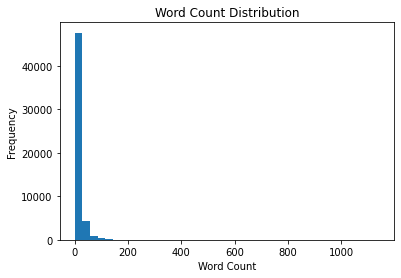

In [65]:
BF['summary_word_count'] = BF['cleaned_summary'].astype('str').str.count(' ')

print(BF.summary_word_count.describe())

# word count distribution
N = 100
print('{} documents in total'.format(BF.shape[0]))
print('{} documents have fewer than {N} words'.format(BF[BF.summary_word_count<=N].shape[0], N = N))
print('{}% documents have fewer than {N} words'.format(round(BF[BF.summary_word_count<=N].shape[0]/BF.shape[0]*100, 1), N = N))

ax = BF.summary_word_count.plot.hist(bins=40)
ax.set_title("Word Count Distribution")
ax.set_xlabel('Word Count')

In [66]:
from gensim import models, corpora
article_summaries = BF['cleaned_summary'].values
article_summaries = [[word for word in nltk.word_tokenize(article)] for article in article_summaries]

# create a dictionary of all the words in the dataset
dictionary = corpora.Dictionary(article_summaries)

# create a corpus
corpus = [dictionary.doc2bow(article) for article in article_summaries]

# create an LDA model
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

In [67]:
import pyLDAvis.gensim
lda_vis = pyLDAvis.gensim.prepare(
    lda,
    corpus, 
    dictionary=lda.id2word,
    mds='mmds',
    sort_topics=False
)

pyLDAvis.display(lda_vis)

C:\Users\bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [68]:
    '''
    def create_wordcloud(model: models.LdaModel, topic: int):
    '''
   # This class will generate a word cloud given an LDA Model and the topic.
    
  #  Args:
  #      mdl: LDA Model
 #       topic: Integer representing the topic
    '''
    text = {word: value for word, value in model.show_topic(topic, topn=50)}
    wc = WordCloud(
        background_color="white",
        max_words=1000
    )
    wc.generate_from_frequencies(text)
    plt.clf()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
    
    for i in range (0,10):
    create_wordcloud(lda, topic=i)
    '''

IndentationError: unexpected indent (1097656947.py, line 9)

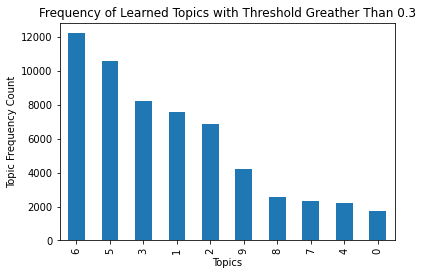

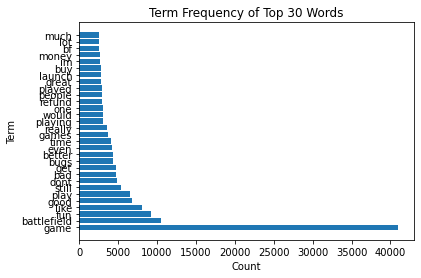

In [69]:
def top_relevant_topics_per_article(mdl: models.LdaModel, corpus: list, articles: list, th: int) -> pd.DataFrame:
    """This method will create a dataframe which identifies the top relevant topics
    greater than a threshold for a given article.
    
    Args:
        mdl: LDA model
        corpus: List of tuples holding the corpus
        articles: List of strings with the article summaries
        th: Integer indicating the threshold of probability the topic must be greater than
    
    Returns:
        A DataFrame with the columns "articl", "topic" and "probability".
    """
    relevant_df = []
    
    for i, article in enumerate(articles):
        topics = mdl.get_document_topics(corpus[i])
        topics = sorted(topics, key = lambda x : x[1], reverse = True)[:5]
        for topic in topics:
            proba = topic[1]
            if proba > th:
                data = {
                    "article" : article,
                    "topic" : topic[0],
                    "proba" : proba
                }
                relevant_df.append(pd.DataFrame([data]))
    return pd.concat(relevant_df)
    
th = 0.3
articles = [' '.join(article) for article in article_summaries]
rel_df = top_relevant_topics_per_article(lda, corpus, articles, th)

plt.clf()
rel_df['topic'].value_counts().plot(kind = 'bar')
plt.xlabel("Topics")
plt.ylabel("Topic Frequency Count")
plt.title("Frequency of Learned Topics with Threshold Greather Than {th}".format(th=th))
plt.show()

list_sorted_token = sorted(lda.id2word.cfs.items(), key=lambda item: item[1], reverse=True)

term_freq_df = pd.DataFrame(
    data={
        'term' : [lda.id2word[key] for (key, value) in list_sorted_token],
        'term_freq': [value for (key, value) in list_sorted_token]
    }
)

N = 30
plt.clf()
plt.barh(
    term_freq_df.head(N)['term'],
    term_freq_df.head(N)['term_freq']
)
plt.xlabel("Count")
plt.ylabel("Term")
plt.title("Term Frequency of Top {N} Words".format(N = N))
plt.show()

In [70]:
from pprint import pprint
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
data =BF.review.tolist()

# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
data_words = list(sent_to_words(data))

In [71]:
listc= []
for i in range(len(article_summaries)):
    c=' '.join([str(a) for a in article_summaries[i]])
    listc.append(c)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  
# num chars > 3
                             # max_features=50000,             
   )
data_vectorized = vectorizer.fit_transform(listc)

In [73]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [74]:
# Build LDA Model
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attribute

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [75]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                         evaluate_every=-1, 
                          learning_decay=0.7,
 
                          learning_method='online', 
                          learning_offset=10.0,
 
                          max_doc_update_iter=100, 
                          max_iter=10, 
                          mean_change_tol=0.001,
 
                          n_components=10, 
                          n_jobs=-1, 
                          perp_tol=0.1,
 
                          random_state=100, 
                          topic_word_prior=None,
 
                          total_samples=1000000.0, 
                          verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [76]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -3726029.568991361
Perplexity:  1211.7522512503303
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [77]:
#from sklearn.model_selection import GridSearchCV
# Define Search Param
#search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
#lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
#model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
#model.fit(data_vectorized)
#GridSearchCV(cv=None, error_score='raise',
#       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
#             evaluate_every=-1, learning_decay=0.7, learning_method=None,
#             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
#             mean_change_tol=0.001, n_components=10, n_jobs=1,
#             perp_tol=0.1, random_state=None,
#             topic_word_prior=None, total_samples=1000000.0, verbose=0),
#       fit_params=None, iid=True, n_jobs=1,
#       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
#       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#       scoring=None, verbose=0)

In [78]:
# Best Model
#best_lda_model = model.best_estimator_
# Model Parameters
#print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
#print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
#print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [142]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame(columns = ['topicNum','prop_topic','topicKey'])
    
    for i, row_list in enumerate(lda[corpus]):
            row = row_list[0] if lda.per_word_topics else row_list            
            #print(row)
            row = sorted(row, key=lambda x: (x[1]), reverse= True)
            #print(row)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = lda.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    g = pd.DataFrame(np.array([[topic_num,prop_topic,topic_keywords]]),
                                    columns = ['topicNum','prop_topic','topicKey'])
                    sent_topics_df=pd.concat([sent_topics_df,g])
                    
                else:
                    break
    
            return(sent_topics_df)

 

In [143]:

format_topics_sentences(ldamodel= lda_model, corpus=corpus, texts=article_summaries)

,topicNum,prop_topic,topicKey
0,6,0.7371504,"game, still, better, launch, release, would, f..."


In [ ]:
lda_vis = pyLDAvis.gensim.prepare(
    lda,
    corpus, 
    dictionary=lda.id2word,
    mds='mmds',
    sort_topics=False
)

pyLDAvis.display(lda_vis)

In [ ]:
pprint(lda[corpus])